# **Part 1 : To create Featured dataset**

In [ ]:
from google.colab import drive 
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
import pandas as pd
import math as mth
import numpy as np
import sys
from sklearn import metrics
import re,time
from sklearn.model_selection import train_test_split
from nltk.corpus import stopwords
import math
from sklearn.metrics.pairwise import cosine_similarity

In [ ]:
"""Dataset loading"""
df = pd.read_csv('/content/gdrive/MyDrive/Clickbait Detection/clickbait_dataset.csv')
#df = pd.read_csv('C:/Users/shiva/Desktop/newsdataset1.csv')
#df = pd.read_csv('C:/Users/shiva/Desktop/newsdataset500.csv')
print(df.shape)
df.head()


(10000, 4)


,id,title,body,label
0,1,पोखरा बिहीबार ३५ सय ग्यास वितरण हुँदै,"पोखरा, १३ चैत / पोखरामा आज ३ हजार ५ सय ग्यास ब...",NonClickbait
1,2,"गण्डकीमा १७ जनाको कोरोना परीक्षण, १३ जनाको नेग...","पोखरा, १३ चैत / गण्डकी प्रदेशमा कोरोना भाइरसको...",NonClickbait
2,3,"पोखरामा क्वारेन्टाइनमा रहेका एक जनाको मृत्यु, ...","पोखरा, १३ चैत / कास्कीको रुपा गाउँपालिकाको क्व...",NonClickbait
3,4,कोरोना रोकथाम अभियानका लागि पोखराका वडामा समन्...,पोखरा महानगरपालिकाले कोरोनाको रोकथाम र न्यूनीक...,NonClickbait
4,5,पोखरा सडक पेटीमा अलपत्र वृद्धवृद्धालाई कास्की ...,"पोखरा, १२ चैत / पोखरा सडक पेटीमा अलपत्र अवस्था...",NonClickbait


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'NonClickbait Vs Clickbait')

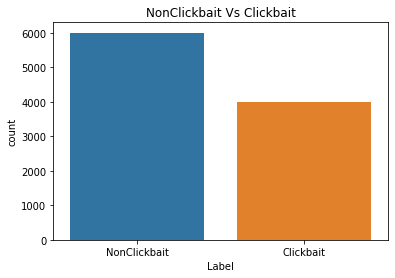

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
data_final = df[['id','title','body','label']]
data_final.dropna(inplace=True)
sns.countplot(data_final.label)
plt.xlabel('Label')
plt.title('NonClickbait Vs Clickbait')

In [ ]:
df.columns = ["id","title","body","Label"]


In [ ]:
"""Concatenating title and body to text"""

df['text'] = df['title'] +" "+ df['body']

In [ ]:
df.head()

,id,title,body,Label,text
0,1,पोखरा बिहीबार ३५ सय ग्यास वितरण हुँदै,"पोखरा, १३ चैत / पोखरामा आज ३ हजार ५ सय ग्यास ब...",NonClickbait,"पोखरा बिहीबार ३५ सय ग्यास वितरण हुँदै पोखरा, ..."
1,2,"गण्डकीमा १७ जनाको कोरोना परीक्षण, १३ जनाको नेग...","पोखरा, १३ चैत / गण्डकी प्रदेशमा कोरोना भाइरसको...",NonClickbait,"गण्डकीमा १७ जनाको कोरोना परीक्षण, १३ जनाको नेग..."
2,3,"पोखरामा क्वारेन्टाइनमा रहेका एक जनाको मृत्यु, ...","पोखरा, १३ चैत / कास्कीको रुपा गाउँपालिकाको क्व...",NonClickbait,"पोखरामा क्वारेन्टाइनमा रहेका एक जनाको मृत्यु, ..."
3,4,कोरोना रोकथाम अभियानका लागि पोखराका वडामा समन्...,पोखरा महानगरपालिकाले कोरोनाको रोकथाम र न्यूनीक...,NonClickbait,कोरोना रोकथाम अभियानका लागि पोखराका वडामा समन्...
4,5,पोखरा सडक पेटीमा अलपत्र वृद्धवृद्धालाई कास्की ...,"पोखरा, १२ चैत / पोखरा सडक पेटीमा अलपत्र अवस्था...",NonClickbait,पोखरा सडक पेटीमा अलपत्र वृद्धवृद्धालाई कास्की ...


In [ ]:
"""Columns assigning"""

id_col = df.iloc[0:, 0]
#print(id_col)
title_col = df.iloc[0:, 1]
#print(title_col[158])
body_col = df.iloc[0:, 2]
#print(body_col[158])
label_col = df.iloc[0:, 3]
#print(label_col)
text_col=df.iloc[0:,4]
#print(text_col)

In [ ]:
"""Function for data preprocessing and stop words removal"""

#function for data preprocessing
def data_preprocessing(string):
    text = re.sub('\*|\!|\#|\$|\%|\^|\&|\¥|\:|\~|\¬|\=|\ः|\÷|\,|\.|\@|\-|\"|\'|\–|\n|\n\n|\t|\)|\(|\)|\{|\}|\[|\]|!|‘|’|“|”|\:-|\?|।|/|\—','  ',string)
    text=re.sub(r'[a-zA-Z0-9]+', '  ', text)
    text=re.sub('\१',' एक ',text)
    text=re.sub('\२',' दुई',text)
    text=re.sub('\३',' तीन ',text)
    text=re.sub('\४',' चार ',text)
    text=re.sub('\५',' पाँच ',text)
    text=re.sub('\६',' ६ ',text)
    text=re.sub('\७',' सात ',text)
    text=re.sub('\८',' आठ ',text)
    text=re.sub('\९',' नौ ',text)
    text=re.sub('\०',' शून्य ',text)
    return text      #returns text

def remove_suffix(textlist):
    suffixes = ['अघि','अनुरुप','अनुरूप','अनुसार','अनुसारै','उत्ति','का','की','के','कै','को','गरी','गर्दै','छन्','छिन्','छौँ','जति','जना',
                'जस्ता','जस्तै','जस्तो','ज्यु','ज्यू','झैँ','तर्फ','तर्फी','तापनि','तिर','तिरै','त्यहीँ','थिए','थियो','दिइन्','दिए','देख','हँदा',
                'देखि','देखी','द्धरा','द्धारा','द्वार','नथे','निम्ति','निम्ती','नेछौं','नै','नौँ','पछि','पट्टी','पनि','पनी','पर्छ','पर्दछ',
                'पर्ने','पर्यो','पश्चात्','पुर्ण','पूर्वक','प्रति','बमोजिम','बाट','बाटै','बापत','बारे','बाहेक','बिच','बिना','बीच','बेला','भए',
                'भएको','भन्दा','भन्ने','भयो','भरि','भित्र','भित्रै','मा','मात्र','मात्रै','माथि','माथी','मार्फत','मुक्त','मुनि','मे','मै','युक्त',
                'रहने','रहे','रहेका','रहेकी','रूप','लगत्तै','लगाएत','लगायत','लाइ','लाई','लार्ई','लागि','लागी','ले','वटा','वाट','वापत',
                'वारे','विच','विना','विरुद्ध','विरूद्ध','सँग','सँगै','संग','संगत','संगै','सके','सग','सगै','सगै','समक्ष','समेत','सम्बन्धी',
                'सम्म','सम्म्','सहित','साथ','साथै','सामू','सित','से','स्थित','स्वरुप','हन्थ्यो','हरु','हरू','हुने','हुनेछ','हुन्','हुन्छ','हे',
                'हो','होला','होस','होस्']
     
    new_words1 = []
    new_words2 = []
    new_words3 = []
    for word in textlist:        
        for suffix in suffixes:
            if word.endswith(suffix):
                word = word[:-len(suffix)]
        new_words1.append(word)
    
    for word in new_words1:
        for suffix in suffixes:
            if word.endswith(suffix):
                word = word[:-len(suffix)]
        new_words2.append(word)

    for word in new_words2:
        for suffix in suffixes:
            if word.endswith(suffix):
                word = word[:-len(suffix)]
        new_words3.append(word)
        
    return new_words3


#function to remove stop words
def stop_word_remove(array_element):
    #stop_words = set(['मैले','छ','र','तर','को','मा','म','त','यो','ती','न','पनि','छन्','अब','के','छु','भए','यस','ले','लागि','भन','हरे','हरेक','हो','तथा','भएको','गरेको','भने','गर्न','गर्ने','यी','का','गरि','कि','जुन','गरेर','छैन','अलग','आए','अझै','गए','गरौं','गर्छ','गर्छु','कतै','जब','जबकि','जसको','तल','भर','जे','जो','ठीक','धेरै','नजिकै','नत्र'])
    stop_words = stopwords.words('nepali')
    stop_words = set(stop_words) - set(['एक','दुई','तीन','चार','पाँच','सात','नौ'])
    array_element_set = set(array_element)
    final_list = list(array_element_set.difference(stop_words))
    return final_list       #returns final_list

In [ ]:
"""Code for text column procesing"""

text_col = text_col.fillna(0)
#print(second_col)
#print(second_col.isna().sum())
text_with_split = []
splited_text= []
#stop_words_split_final2 = []

#stop_words = open('C:\\Users\\shiva\\Desktop\\stops.txt','r').read().split()

#function for data splitting for News Title
def split_text():
    for text in text_col:
        preprocessed_text= data_preprocessing(text) #calls data-preprocessing() and passes data2
        #print(return_string)
        splited_text = preprocessed_text.split()
        #print(each_docs2)
        text_after_remove_suffix=remove_suffix (splited_text)
        text_after_remove_stopword=stop_word_remove(text_after_remove_suffix)      #calls stop_word_remove()
        #print(string_after_remove_word2)
        text_with_split.append(text_after_remove_stopword)
    return text_with_split  # it returns arr of each docs with splited words

#title_lists = []
text_lists = split_text()
#print(text_lists)
length_of_textlist = len(text_lists)
#####################################
print(length_of_textlist)

**Vocabulary Creation**

In [ ]:
"""Code for taking out the vocabulary from all the text"""

import tensorflow as tf
tokenizer = tf.keras.preprocessing.text.Tokenizer(num_words=2)
tokenizer.fit_on_texts(text_lists)
sequences = tokenizer.texts_to_sequences(text_lists)
word_voc = tokenizer.word_index
print('Vocabulary size:', len(word_voc))
#print(tokenizer.texts_to_sequences([]))
##wordset=tokenizer.word_index
print(word_voc)
l=len(word_voc)
#print(l)

Vocabulary size: 69125
{'': 1, 'एक': 2, 'गरे': 3, 'दुई': 4, 'तीन': 5, 'पाँच': 6, 'शून्य': 7, 'चार': 8, 'प्रहरी': 9, 'सात': 10, 'गरिए': 11, '६': 12, 'जानकारी': 13, 'जिल्ला': 14, 'नेपाल': 15, 'कार्यालय': 16, 'आठ': 17, 'नौ': 18, 'उन': 19, 'जनाए': 20, 'पक्राउ': 21, 'बताए': 22, 'परे': 23, 'वर्ष': 24, 'प्रमुख': 25, 'दिन': 26, 'उनी': 27, 'नगरपालि': 28, 'हजार': 29, 'घर': 30, 'अवस्था': 31, 'सरकार': 32, 'अध्यक्ष': 33, 'अनुसन्धान': 34, 'क्षेत्र': 35, 'बताउनु': 36, 'गते': 37, 'कार्यक्रम': 38, 'काम': 39, 'रुप': 40, 'लाख': 41, 'स्थानीय': 42, 'कारण': 43, 'भइ': 44, 'भन्दै': 45, 'विभिन्न': 46, 'गाउँपालि': 47, 'वडा': 48, 'क्रम': 49, 'काठमाडौँ': 50, 'सय': 51, 'दिनु': 52, 'उहाँ': 53, 'नेपाली': 54, 'काठमाडौं': 55, 'उक्त': 56, 'घटना': 57, 'टोली': 58, 'अहि': 59, 'प्रदेश': 60, 'लागे': 61, 'वर्षीय': 62, 'त्यस': 63, 'थप': 64, 'नम्बर': 65, 'विकास': 66, 'समिति': 67, 'आरोप': 68, 'अधिकारी': 69, 'नियन्त्रण': 70, 'सहयोग': 71, 'भारत': 72, 'सदस्य': 73, 'महिला': 74, 'गर्दा': 75, 'अस्पताल': 76, 'लिए': 77, 'बढी': 78, 'हत्

**Data Preprocessing**

In [ ]:
"""Code for title column procesing"""

title_col = title_col.fillna(0)
#print(second_col)
#print(second_col.isna().sum())
title_with_split = []
splited_title = []
#stop_words_split_final2 = []

#stop_words = open('C:\\Users\\shiva\\Desktop\\stops.txt','r').read().split()

#function for data splitting for News Title
def split_title():
    for title in title_col:
        preprocessed_title = data_preprocessing(title) #calls data-preprocessing() and passes data2
        #print(return_string)
        splited_title = preprocessed_title.split()
        #print(each_docs2)
        title_after_remove_suffix=remove_suffix (splited_title)
        title_after_remove_stopword=stop_word_remove(title_after_remove_suffix)      #calls stop_word_remove()
        #print(string_after_remove_word2)
        title_with_split.append(title_after_remove_stopword)
    return title_with_split  # it returns arr of each docs with splited words

title_lists = []
title_lists = split_title()
#print(title_lists)
length_of_titlelist = len(title_lists)
#####################################
print(length_of_titlelist)


10000


In [ ]:
"""Code for body column procesing"""

body_col = body_col.fillna(0)
#print(second_col)
#print(second_col.isna().sum())
body_with_split = []
splited_body = []
#stop_words_split_final3 = []

#stop_words = open('C:\\Users\\shiva\\Desktop\\stops.txt','r').read().split()
#function for data splitting for News body
def split_body():
    for body in body_col:
        preprocessed_body = data_preprocessing(body) #calls data-preprocessing() and passes data2
        #print(return_string)
        splited_body = preprocessed_body.split()
        #print(each_docs2)
        body_after_remove_suffix=remove_suffix (splited_body)
        body_after_remove_stopword=stop_word_remove(body_after_remove_suffix)      #calls stop_word_remove()
        #print(string_after_remove_word2)
        body_with_split.append(body_after_remove_stopword)
    return body_with_split  # it returns arr of each docs with splited words

body_lists = []
body_lists = split_body()
#print(body_lists)
#print(body_lists[158])
length_of_bodylist = len(body_lists)
#####################################
print(length_of_bodylist)



10000


In [ ]:
"""Code for splitted text column procesing"""

df1=pd.DataFrame([text_lists])
df1.shape
df1=df1.transpose()
df1.columns = ["Splited Text"]
df1.head()

,Splited Text
0,"[पाँच, हजार, अभाव, , लक्ष्मण, ल्याउन, लागिए, स..."
1,"[, पाँच, संकलन, विश्वबन्धु, तीब्र, मृत, ल्याउद..."
2,"[, पाँच, ओझा, ल्याए, विनोदविन्दु, मृत, उपचार, ..."
3,"[, प्रहरी, किरणप्रसाद, विहीन, बनाउने, समिति, व..."
4,"[प्रहरी, , उल्लेख, रोग, पुरुष, भेला, विभिन्न, ..."


In [ ]:
"""Code for creating a single dataframe with all the processed columns"""

df1=pd.DataFrame([title_lists,body_lists,text_lists,label_col])
df1.shape
df1=df1.transpose()
df1.columns = ["Splited title","Splited body","Text","Label"]
df1.head()

,Splited title,Splited body,Text,Label
0,"[पाँच, सय, पोखरा, ग्यास, बिहीबार, हुँदै, वितरण...","[पाँच, हजार, अभाव, , लक्ष्मण, ल्याउन, लागिए, स...","[पाँच, हजार, अभाव, , लक्ष्मण, ल्याउन, लागिए, स...",NonClickbait
1,"[, नेगेटिभ, एक, सात, गण्ड, परीक्षण, रिपोर्ट, त...","[, पाँच, संकलन, विश्वबन्धु, तीब्र, मृत, ल्याउद...","[, पाँच, संकलन, विश्वबन्धु, तीब्र, मृत, ल्याउद...",NonClickbait
2,"[, पोखरा, हुँदै, एक, मृत्यु, परीक्षण, कोरोना, ...","[, पाँच, ओझा, ल्याए, विनोदविन्दु, मृत, उपचार, ...","[, पाँच, ओझा, ल्याए, विनोदविन्दु, मृत, उपचार, ...",NonClickbait
3,"[, पोखरा, वडा, रोकथाम, समन्वय, कोरोना, समिति, ...","[, प्रहरी, किरणप्रसाद, विहीन, बनाउने, समिति, व...","[, प्रहरी, किरणप्रसाद, विहीन, बनाउने, समिति, व...",NonClickbait
4,"[प्रहरी, पोखरा, कास्, पेटी, सडक, गरयो, वृद्धवृ...","[, प्रहरी, जोखिम, महिला, केसी, पाँच, उल्लेख, र...","[प्रहरी, , उल्लेख, रोग, पुरुष, भेला, विभिन्न, ...",NonClickbait


In [ ]:
"""Code for making union of each pair of title and body"""

title=[]
body=[]
total=[]
total_list=[]

# Function for making union of title and body

def make_total():
    for index, row in df1.iterrows() :
        #print("index=",index)
        #print(row[0:])
        title=title_lists[index]
        body=body_lists[index]
        #print(title)
        #print(body)
        #join them to remove common duplicate words
        total= set(title).union(set(body))
        total_list.append(total)
        #print(total)
    return total_list
total_words=[]
total_words=make_total()
print(total_words[0])

{'पाँच', 'हजार', 'अभाव', '', 'लक्ष्मण', 'ल्याउन', 'लागिए', 'स्वकिय', 'तिमिल्सिना', 'भन्दै', 'पोखरा', 'मानबहादुर', 'पहि', 'सात', 'गरिदै', 'मेयर', 'डिलर', 'बजार', 'लागे', 'तीन', 'गृहलक्ष्मी', 'भिडभाड', 'आउने', 'किलो', 'एक', 'वितरण', 'बाड्ने', 'आज', 'महानगरपालि', 'उन', 'आवश्यक', 'सचिब', 'सामान', 'सय', 'कु', 'ग्यास', 'बिहीबार', 'हुँदै', 'भोली', 'जिसी', 'बितरण', 'शक्ति', 'चैत', 'जानकारी', 'ग्यासँ', 'बताए', 'शुक्रबार'}


In [ ]:
df2=pd.DataFrame([title_lists,body_lists,total_words,label_col])
df2.shape 
df2=df2.transpose()
df2.columns = ["Splited title","Splited body","Union_total","Label"]
df2.head()

,Splited title,Splited body,Union_total,Label
0,"[पाँच, सय, पोखरा, ग्यास, बिहीबार, हुँदै, वितरण...","[पाँच, हजार, अभाव, , लक्ष्मण, ल्याउन, लागिए, स...","{पाँच, हजार, अभाव, , लक्ष्मण, ल्याउन, लागिए, स...",NonClickbait
1,"[, नेगेटिभ, एक, सात, गण्ड, परीक्षण, रिपोर्ट, त...","[, पाँच, संकलन, विश्वबन्धु, तीब्र, मृत, ल्याउद...","{, पाँच, संकलन, मृत, ल्याउदा, मनिपाल, शर्, रिप...",NonClickbait
2,"[, पोखरा, हुँदै, एक, मृत्यु, परीक्षण, कोरोना, ...","[, पाँच, ओझा, ल्याए, विनोदविन्दु, मृत, उपचार, ...","{, पाँच, ल्याए, मृत, शर्, चिकित्सक, पठाए, नवरा...",NonClickbait
3,"[, पोखरा, वडा, रोकथाम, समन्वय, कोरोना, समिति, ...","[, प्रहरी, किरणप्रसाद, विहीन, बनाउने, समिति, व...","{, प्रहरी, किरणप्रसाद, विहीन, बनाउने, समिति, व...",NonClickbait
4,"[प्रहरी, पोखरा, कास्, पेटी, सडक, गरयो, वृद्धवृ...","[, प्रहरी, जोखिम, महिला, केसी, पाँच, उल्लेख, र...","{प्रहरी, , पाँच, अभाव, उल्लेख, रोग, उचित, पुरु...",NonClickbait


**Cosine Similarity and TFIDF Computation**

In [ ]:
"""Code for computing TF, IDF, TFIDF and Cosine-Similarity"""

#Function for TF function:
def computeTF(wordDict, bow):
    tfDict = {}
    bowCount = len(bow)
    for word, count in wordDict.items():
        tfDict[word] = count/float(bowCount)
    return tfDict

#Function for IDF calculation
def computeIDF(docList):
    idfDict = {}
    N = len(docList)
    #print(N)
    
    idfDict = dict.fromkeys(docList[0].keys(), 0)
    for doc in docList:
        for word, val in doc.items():
            if val > 0:
                idfDict[word] += 1
    
    for word, val in idfDict.items():
        #print(N)
        #print(val)
        if val>0:
            idfDict[word] = 1+math.log10(N/float(val))
        #print(idfDict[word])
        
    return idfDict

#Function for TF-IDF calculation
def computeTFIDF(tfBow, idfs):
    tfidf = {}
    for word, val in tfBow.items():
        tfidf[word] = val*idfs[word]
    return tfidf

#wordDictA=[]
#wordDictB=[]
title=[]
body=[]
total=[]
cos_sim=[]
total_cos_sim=[]
count=0
tfidfTitle=[]
tfidfBody=[]
le=l*2    # gives two time of the length of the vocabulary
#cols=['Cosine_Similarity']
#total=[]
#total_list=[]
#df2 = pd.DataFrame({'Cosine_Similarity': []})
df5 = pd.DataFrame(columns=['TitleVector','BodyVector', 'CosSim'])
#Iteration over dataframe
import numpy as np

for index, row in df1.iterrows():
    title=title_lists[index]
    body=body_lists[index]
    #total=total_words[index]             #original
    total=total_words[index]  #for new
    
    
    #This function is for creating the WordDictionary for Title
    wordDictA = dict.fromkeys(total, 0)
    for word in title:
        wordDictA[word]+=1
    #print(wordDictA)
    
    #This function is for creating the WordDictionary for Body
    
    wordDictB= dict.fromkeys(total, 0)   
    for word in body:
        wordDictB[word]+=1
    #print(wordDictB)

    tf=pd.DataFrame([wordDictA, wordDictB])
    #print(tf)
    
    #print(tf.shape)
    #print(wordDictA)
    #print(wordDictB)

    
    #running title and body through the tf function:
    tfTitle = computeTF(wordDictA, title)
    #print(tfTitle)

    tfBody= computeTF(wordDictB, body)
    #print(tfBody)

    #Converting to dataframe for visualization
    tf_df= pd.DataFrame([tfTitle, tfBody])
    #print(tf_df)

    
    #inputing our sentences in the log file
    idfs = computeIDF([wordDictA, wordDictB])
    #print(idfs)
    
    
    #running the title through the IDF:
    tfidfTitle = computeTFIDF(tfTitle, idfs)
    #print(tfidfTitle)
    #print("\n")
    
    
    #running the body through the IDF:
    tfidfBody = computeTFIDF(tfBody, idfs)
    #print(tfidfBody)
    #print("\n")
    
    tfidf= pd.DataFrame([tfidfTitle, tfidfBody])
    #print(tfidf)
    #News_vector=np.asarray(tfidf)
    #print(News_vector)
    
    
    #putting it in a dataframe
    tfidf_title= pd.DataFrame([tfidfTitle])
    #print(tfidf_title)
    
    tfidf_body=pd.DataFrame([tfidfBody]) #tfidfBody])
    #print(tfidf_body)

    title_vector = np.zeros((1,1500))
    News_vector_title = np.array(tfidf_title)
    shape=np.shape(News_vector_title)
    title_vector[:shape[0],:shape[1]] = News_vector_title
    #News_vector_title=np.reshape(News_vector_title,50)
    title_vector=np.reshape(title_vector,1500)
    #print(title_vector)
    
    
    body_vector = np.zeros((1,1500))
    News_vector_body=np.asarray(tfidf_body)
    #shape=np.shape(News_vector_body)
    body_vector[:shape[0],:shape[1]] = News_vector_body
    #News_vector_body=np.reshape(News_vector_body,2000)
    body_vector=np.reshape(body_vector,1500)
    #print(body_vector)
    #sentence_vectors=sparse_matrix.todense()
    
    News_vector=np.asarray(tfidf)
    #News_vector_reshape=np.reshape(News_vector,4000)
    #print(News_vector_reshape)

    #Computing cosinesimilarity measure of news and body
    cs=cosine_similarity(News_vector)
    #cs=np.reshape(cs,1)
    #print("Cosine Similarity of row %d th pair is:" %index)
    #print(cs)
    cos_sim=cs[0,1]
    #print("Cosine Similarity of row %d th pair is:" %index)
    print("Idx %d: CS %f" %(index,cos_sim),end=' ')
    #id=index+100
    #print("Id:",id)
    #df5 = df5.append({'Title_Vector':News_vector_title,'Body_Vector':News_vector_body,'News_Vector':News_vector_reshape,'Cosine_Similarity':cos_sim}, ignore_index=True)
    df5 = df5.append({'Title_Vector':title_vector,'Body_Vector':body_vector,'Cosine_Similarity':cos_sim}, ignore_index=True)
    #df6 = df6.append({News_vector_title}, ignore_index=True)


Idx 0: CS 0.230789 Idx 1: CS 0.265697 Idx 2: CS 0.245764 Idx 3: CS 0.151158 Idx 4: CS 0.219823 Idx 5: CS 0.295508 Idx 6: CS 0.328349 Idx 7: CS 0.362118 Idx 8: CS 0.205107 Idx 9: CS 0.241143 Idx 10: CS 0.228281 Idx 11: CS 0.260337 Idx 12: CS 0.351164 Idx 13: CS 0.243172 Idx 14: CS 0.131342 Idx 15: CS 0.418785 Idx 16: CS 0.375461 Idx 17: CS 0.253534 Idx 18: CS 0.263951 Idx 19: CS 0.067808 Idx 20: CS 0.262234 Idx 21: CS 0.257294 Idx 22: CS 0.206975 Idx 23: CS 0.305240 Idx 24: CS 0.167267 Idx 25: CS 0.182472 Idx 26: CS 0.092261 Idx 27: CS 0.184213 Idx 28: CS 0.295384 Idx 29: CS 0.134124 Idx 30: CS 0.226855 Idx 31: CS 0.190141 Idx 32: CS 0.122373 Idx 33: CS 0.173195 Idx 34: CS 0.209675 Idx 35: CS 0.191855 Idx 36: CS 0.115175 Idx 37: CS 0.245677 Idx 38: CS 0.196241 Idx 39: CS 0.286632 Idx 40: CS 0.172942 Idx 41: CS 0.135386 Idx 42: CS 0.299395 Idx 43: CS 0.116462 Idx 44: CS 0.314030 Idx 45: CS 0.191321 Idx 46: CS 0.148423 Idx 47: CS 0.216690 Idx 48: CS 0.139930 Idx 49: CS 0.191855 Idx 50: CS

In [ ]:
df5

,TitleVector,BodyVector,CosSim,Body_Vector,Cosine_Similarity,Title_Vector
0,NaN,NaN,NaN,"[0.028911777681421807, 0.028911777681421807, 0...",0.230789,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.162..."
1,NaN,NaN,NaN,"[0.012658227848101266, 0.016468734122328875, 0...",0.265697,"[0.1111111111111111, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
2,NaN,NaN,NaN,"[0.017241379310344827, 0.022431551649378986, 0...",0.245764,"[0.125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.1..."
3,NaN,NaN,NaN,"[0.005747126436781609, 0.007477183883126329, 0...",0.151158,"[0.1111111111111111, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
4,NaN,NaN,NaN,"[0.01548845232933311, 0.01548845232933311, 0.0...",0.219823,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
...,...,...,...,...,...,...
9995,NaN,NaN,NaN,"[0.017241379310344827, 0.022431551649378986, 0...",0.054627,"[0.1111111111111111, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
9996,NaN,NaN,NaN,"[0.030256511527069332, 0.030256511527069332, 0...",0.000000,"[0.0, 0.0, 0.0, 0.21683833261066354, 0.0, 0.0,..."
9997,NaN,NaN,NaN,"[0.037172285590399465, 0.037172285590399465, 0...",0.088783,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.2168383326106..."
9998,NaN,NaN,NaN,"[0.015675060188722667, 0.015675060188722667, 0...",0.025322,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


In [ ]:
df6=df5.drop(['TitleVector','BodyVector','CosSim'],axis=1)
df6

,Body_Vector,Cosine_Similarity,Title_Vector
0,"[0.028911777681421807, 0.028911777681421807, 0...",0.230789,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.162..."
1,"[0.012658227848101266, 0.016468734122328875, 0...",0.265697,"[0.1111111111111111, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
2,"[0.017241379310344827, 0.022431551649378986, 0...",0.245764,"[0.125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.1..."
3,"[0.005747126436781609, 0.007477183883126329, 0...",0.151158,"[0.1111111111111111, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
4,"[0.01548845232933311, 0.01548845232933311, 0.0...",0.219823,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
...,...,...,...
9995,"[0.017241379310344827, 0.022431551649378986, 0...",0.054627,"[0.1111111111111111, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
9996,"[0.030256511527069332, 0.030256511527069332, 0...",0.000000,"[0.0, 0.0, 0.0, 0.21683833261066354, 0.0, 0.0,..."
9997,"[0.037172285590399465, 0.037172285590399465, 0...",0.088783,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.2168383326106..."
9998,"[0.015675060188722667, 0.015675060188722667, 0...",0.025322,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


In [ ]:
"""Code for concatenating df and df6"""
df7=pd.concat([df,df6],axis=1)
df7.head()

,id,title,body,Label,text,Body_Vector,Cosine_Similarity,Title_Vector
0,1,पोखरा बिहीबार ३५ सय ग्यास वितरण हुँदै,"पोखरा, १३ चैत / पोखरामा आज ३ हजार ५ सय ग्यास ब...",NonClickbait,"पोखरा बिहीबार ३५ सय ग्यास वितरण हुँदै पोखरा, ...","[0.028911777681421807, 0.028911777681421807, 0...",0.230789,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.162..."
1,2,"गण्डकीमा १७ जनाको कोरोना परीक्षण, १३ जनाको नेग...","पोखरा, १३ चैत / गण्डकी प्रदेशमा कोरोना भाइरसको...",NonClickbait,"गण्डकीमा १७ जनाको कोरोना परीक्षण, १३ जनाको नेग...","[0.012658227848101266, 0.016468734122328875, 0...",0.265697,"[0.1111111111111111, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
2,3,"पोखरामा क्वारेन्टाइनमा रहेका एक जनाको मृत्यु, ...","पोखरा, १३ चैत / कास्कीको रुपा गाउँपालिकाको क्व...",NonClickbait,"पोखरामा क्वारेन्टाइनमा रहेका एक जनाको मृत्यु, ...","[0.017241379310344827, 0.022431551649378986, 0...",0.245764,"[0.125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.1..."
3,4,कोरोना रोकथाम अभियानका लागि पोखराका वडामा समन्...,पोखरा महानगरपालिकाले कोरोनाको रोकथाम र न्यूनीक...,NonClickbait,कोरोना रोकथाम अभियानका लागि पोखराका वडामा समन्...,"[0.005747126436781609, 0.007477183883126329, 0...",0.151158,"[0.1111111111111111, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
4,5,पोखरा सडक पेटीमा अलपत्र वृद्धवृद्धालाई कास्की ...,"पोखरा, १२ चैत / पोखरा सडक पेटीमा अलपत्र अवस्था...",NonClickbait,पोखरा सडक पेटीमा अलपत्र वृद्धवृद्धालाई कास्की ...,"[0.01548845232933311, 0.01548845232933311, 0.0...",0.219823,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


In [ ]:
df8=df7.drop(['id','title','body','text'],axis=1)
df8

,Label,Body_Vector,Cosine_Similarity,Title_Vector
0,NonClickbait,"[0.028911777681421807, 0.028911777681421807, 0...",0.230789,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.162..."
1,NonClickbait,"[0.012658227848101266, 0.016468734122328875, 0...",0.265697,"[0.1111111111111111, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
2,NonClickbait,"[0.017241379310344827, 0.022431551649378986, 0...",0.245764,"[0.125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.1..."
3,NonClickbait,"[0.005747126436781609, 0.007477183883126329, 0...",0.151158,"[0.1111111111111111, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
4,NonClickbait,"[0.01548845232933311, 0.01548845232933311, 0.0...",0.219823,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
...,...,...,...,...
9995,Clickbait,"[0.017241379310344827, 0.022431551649378986, 0...",0.054627,"[0.1111111111111111, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
9996,Clickbait,"[0.030256511527069332, 0.030256511527069332, 0...",0.000000,"[0.0, 0.0, 0.0, 0.21683833261066354, 0.0, 0.0,..."
9997,Clickbait,"[0.037172285590399465, 0.037172285590399465, 0...",0.088783,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.2168383326106..."
9998,Clickbait,"[0.015675060188722667, 0.015675060188722667, 0...",0.025322,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


In [ ]:
df9=df8.drop(['Title_Vector','Body_Vector'],axis=1)
df9

,Label,Cosine_Similarity
0,NonClickbait,0.230789
1,NonClickbait,0.265697
2,NonClickbait,0.245764
3,NonClickbait,0.151158
4,NonClickbait,0.219823
...,...,...
9995,Clickbait,0.054627
9996,Clickbait,0.000000
9997,Clickbait,0.088783
9998,Clickbait,0.025322


**Featured Dataset creation and writing into file**

In [ ]:
"""Code to write datasets into csv files"""

title=df8['Title_Vector']
body=df8['Body_Vector']
#news=df8['News_Vector']

import csv
f1=csv.writer(open("/content/gdrive/MyDrive/Clickbait Detection/Title.csv","w+"))
for index,row in df8.iterrows():
    t=title[index]
    f1.writerow(t)
f2=csv.writer(open("/content/gdrive/MyDrive/Clickbait Detection/Body.csv","w+"))  
for index,row in df8.iterrows():
    b=body[index]
    f2.writerow(b)
df9.to_csv('/content/gdrive/MyDrive/Clickbait Detection/Cos.csv')


In [ ]:
# load dataset
df_t = pd.read_csv("/content/gdrive/MyDrive/Clickbait Detection/Title.csv",header=None).add_prefix('t')
df_b = pd.read_csv("/content/gdrive/MyDrive/Clickbait Detection/Body.csv",header=None).add_prefix('b')
df_c = pd.read_csv("/content/gdrive/MyDrive/Clickbait Detection/Cos.csv")

In [ ]:
df10=pd.concat([df_t,df_b],axis=1)
df10.head()


,t0,t1,t2,t3,t4,t5,t6,t7,t8,t9,t10,t11,t12,t13,t14,t15,t16,t17,t18,t19,t20,t21,t22,t23,t24,t25,t26,t27,t28,t29,t30,t31,t32,t33,t34,t35,t36,t37,t38,t39,...,b1460,b1461,b1462,b1463,b1464,b1465,b1466,b1467,b1468,b1469,b1470,b1471,b1472,b1473,b1474,b1475,b1476,b1477,b1478,b1479,b1480,b1481,b1482,b1483,b1484,b1485,b1486,b1487,b1488,b1489,b1490,b1491,b1492,b1493,b1494,b1495,b1496,b1497,b1498,b1499
0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.162629,0.0,0.162629,0.125,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.000,0.0,0.000000,0.125000,0.0,0.000,0.125000,0.000000,0.125,0.0,0.0,0.125,0.000000,0.0,0.125000,0.0,0.000,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.111111,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.000,0.0,0.111111,0.111111,0.0,0.000,0.000000,0.000000,0.000,0.0,0.0,0.000,0.000000,0.0,0.111111,0.0,0.000,0.111111,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.125000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.162629,0.0,0.000000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.125,0.125,0.0,0.000000,0.000000,0.0,0.125,0.000000,0.000000,0.000,0.0,0.0,0.000,0.000000,0.0,0.000000,0.0,0.125,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.111111,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.000,0.0,0.000000,0.000000,0.0,0.000,0.000000,0.111111,0.000,0.0,0.0,0.000,0.144559,0.0,0.000000,0.0,0.000,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.000,0.0,0.000000,0.000000,0.0,0.000,0.111111,0.000000,0.000,0.0,0.0,0.000,0.000000,0.0,0.000000,0.0,0.000,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
df11=pd.concat([df_c,df10],axis=1)
df11.head()

,Unnamed: 0,Label,Cosine_Similarity,t0,t1,t2,t3,t4,t5,t6,t7,t8,t9,t10,t11,t12,t13,t14,t15,t16,t17,t18,t19,t20,t21,t22,t23,t24,t25,t26,t27,t28,t29,t30,t31,t32,t33,t34,t35,t36,...,b1460,b1461,b1462,b1463,b1464,b1465,b1466,b1467,b1468,b1469,b1470,b1471,b1472,b1473,b1474,b1475,b1476,b1477,b1478,b1479,b1480,b1481,b1482,b1483,b1484,b1485,b1486,b1487,b1488,b1489,b1490,b1491,b1492,b1493,b1494,b1495,b1496,b1497,b1498,b1499
0,0,NonClickbait,0.230789,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.162629,0.0,0.162629,0.125,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.000,0.0,0.000000,0.125000,0.0,0.000,0.125000,0.000000,0.125,0.0,0.0,0.125,0.000000,0.0,0.125000,0.0,0.000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,NonClickbait,0.265697,0.111111,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.000,0.0,0.111111,0.111111,0.0,0.000,0.000000,0.000000,0.000,0.0,0.0,0.000,0.000000,0.0,0.111111,0.0,0.000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,NonClickbait,0.245764,0.125000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.162629,0.0,0.000000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.125,0.125,0.0,0.000000,0.000000,0.0,0.125,0.000000,0.000000,0.000,0.0,0.0,0.000,0.000000,0.0,0.000000,0.0,0.125,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,NonClickbait,0.151158,0.111111,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.000,0.0,0.000000,0.000000,0.0,0.000,0.000000,0.111111,0.000,0.0,0.0,0.000,0.144559,0.0,0.000000,0.0,0.000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,NonClickbait,0.219823,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.000,0.0,0.000000,0.000000,0.0,0.000,0.111111,0.000000,0.000,0.0,0.0,0.000,0.000000,0.0,0.000000,0.0,0.000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
df11.to_csv('/content/gdrive/MyDrive/Clickbait Detection/FeaturedData.csv')

For SVM...........
https://www.datacamp.com/community/tutorials/svm-classification-scikit-learn-python

**Part 2**

In [ ]:
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
from sklearn.model_selection import cross_val_score,cross_val_predict
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report 
from keras.layers import Dense, Dropout, Activation, Flatten
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


In [ ]:
df_all = pd.read_csv("/content/gdrive/MyDrive/Clickbait Detection/FeaturedData.csv")
df_all.head()

,Unnamed: 0,Unnamed: 0.1,Label,Cosine_Similarity,t0,t1,t2,t3,t4,t5,t6,t7,t8,t9,t10,t11,t12,t13,t14,t15,t16,t17,t18,t19,t20,t21,t22,t23,t24,t25,t26,t27,t28,t29,t30,t31,t32,t33,t34,t35,...,b1460,b1461,b1462,b1463,b1464,b1465,b1466,b1467,b1468,b1469,b1470,b1471,b1472,b1473,b1474,b1475,b1476,b1477,b1478,b1479,b1480,b1481,b1482,b1483,b1484,b1485,b1486,b1487,b1488,b1489,b1490,b1491,b1492,b1493,b1494,b1495,b1496,b1497,b1498,b1499
0,0,0,NonClickbait,0.230789,0.125000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.125,0.000000,0.0,0.000,0.0,0.000000,0.0,0.0,0.000000,0.125,0.0,0.0,0.000000,0.0,0.0,0.125,0.0,0.0,0.000,0.0,0.0,0.0,0.000000,0.125,0.0,0.125,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,1,NonClickbait,0.265697,0.111111,0.0,0.0,0.0,0.0,0.000000,0.0,0.111111,0.000000,0.0,0.000,0.000000,0.0,0.000,0.0,0.000000,0.0,0.0,0.111111,0.000,0.0,0.0,0.111111,0.0,0.0,0.000,0.0,0.0,0.000,0.0,0.0,0.0,0.111111,0.000,0.0,0.000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,2,NonClickbait,0.245764,0.125000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.125000,0.0,0.000,0.000000,0.0,0.125,0.0,0.000000,0.0,0.0,0.000000,0.000,0.0,0.0,0.000000,0.0,0.0,0.000,0.0,0.0,0.125,0.0,0.0,0.0,0.000000,0.000,0.0,0.000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,3,NonClickbait,0.151158,0.111111,0.0,0.0,0.0,0.0,0.111111,0.0,0.111111,0.111111,0.0,0.000,0.000000,0.0,0.000,0.0,0.111111,0.0,0.0,0.000000,0.000,0.0,0.0,0.000000,0.0,0.0,0.000,0.0,0.0,0.000,0.0,0.0,0.0,0.000000,0.000,0.0,0.000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,4,NonClickbait,0.219823,0.111111,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000,0.111111,0.0,0.000,0.0,0.000000,0.0,0.0,0.000000,0.000,0.0,0.0,0.000000,0.0,0.0,0.000,0.0,0.0,0.000,0.0,0.0,0.0,0.000000,0.000,0.0,0.000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
from sklearn import preprocessing 
  
# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder() 

df_all['Label']= label_encoder.fit_transform(df_all['Label']) 
  
df_all['Label'].unique() 

array([1, 0])

In [ ]:
df_all.head()


,Unnamed: 0,Unnamed: 0.1,Label,Cosine_Similarity,t0,t1,t2,t3,t4,t5,t6,t7,t8,t9,t10,t11,t12,t13,t14,t15,t16,t17,t18,t19,t20,t21,t22,t23,t24,t25,t26,t27,t28,t29,t30,t31,t32,t33,t34,t35,...,b1460,b1461,b1462,b1463,b1464,b1465,b1466,b1467,b1468,b1469,b1470,b1471,b1472,b1473,b1474,b1475,b1476,b1477,b1478,b1479,b1480,b1481,b1482,b1483,b1484,b1485,b1486,b1487,b1488,b1489,b1490,b1491,b1492,b1493,b1494,b1495,b1496,b1497,b1498,b1499
0,0,0,1,0.230789,0.125000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.125,0.000000,0.0,0.000,0.0,0.000000,0.0,0.0,0.000000,0.125,0.0,0.0,0.000000,0.0,0.0,0.125,0.0,0.0,0.000,0.0,0.0,0.0,0.000000,0.125,0.0,0.125,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,1,1,0.265697,0.111111,0.0,0.0,0.0,0.0,0.000000,0.0,0.111111,0.000000,0.0,0.000,0.000000,0.0,0.000,0.0,0.000000,0.0,0.0,0.111111,0.000,0.0,0.0,0.111111,0.0,0.0,0.000,0.0,0.0,0.000,0.0,0.0,0.0,0.111111,0.000,0.0,0.000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,2,1,0.245764,0.125000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.125000,0.0,0.000,0.000000,0.0,0.125,0.0,0.000000,0.0,0.0,0.000000,0.000,0.0,0.0,0.000000,0.0,0.0,0.000,0.0,0.0,0.125,0.0,0.0,0.0,0.000000,0.000,0.0,0.000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,3,1,0.151158,0.111111,0.0,0.0,0.0,0.0,0.111111,0.0,0.111111,0.111111,0.0,0.000,0.000000,0.0,0.000,0.0,0.111111,0.0,0.0,0.000000,0.000,0.0,0.0,0.000000,0.0,0.0,0.000,0.0,0.0,0.000,0.0,0.0,0.0,0.000000,0.000,0.0,0.000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,4,1,0.219823,0.111111,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000,0.111111,0.0,0.000,0.0,0.000000,0.0,0.0,0.000000,0.000,0.0,0.0,0.000000,0.0,0.0,0.000,0.0,0.0,0.000,0.0,0.0,0.0,0.000000,0.000,0.0,0.000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
df_all.drop(['Unnamed: 0'], inplace=True, axis = 1) 


In [ ]:
df_all.drop(['Unnamed: 0.1'],  inplace=True, axis = 1) 

In [ ]:
df_all

,Label,Cosine_Similarity,t0,t1,t2,t3,t4,t5,t6,t7,t8,t9,t10,t11,t12,t13,t14,t15,t16,t17,t18,t19,t20,t21,t22,t23,t24,t25,t26,t27,t28,t29,t30,t31,t32,t33,t34,t35,t36,t37,...,b1460,b1461,b1462,b1463,b1464,b1465,b1466,b1467,b1468,b1469,b1470,b1471,b1472,b1473,b1474,b1475,b1476,b1477,b1478,b1479,b1480,b1481,b1482,b1483,b1484,b1485,b1486,b1487,b1488,b1489,b1490,b1491,b1492,b1493,b1494,b1495,b1496,b1497,b1498,b1499
0,1,0.230789,0.125000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.125,0.000000,0.0,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.125000,0.000000,0.000000,0.000000,0.0,0.000000,0.125000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.125,0.0,0.125,0.162629,0.162629,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,0.265697,0.111111,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.111111,0.000000,0.000000,0.000,0.000000,0.0,0.000,0.000000,0.000000,0.000000,0.000000,0.111111,0.000000,0.000000,0.000000,0.111111,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.111111,0.000,0.0,0.000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,0.245764,0.125000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.125000,0.000000,0.000,0.000000,0.0,0.125,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.125000,0.0,0.000000,0.000000,0.000000,0.000,0.0,0.000,0.000000,0.125000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1,0.151158,0.111111,0.000000,0.0,0.0,0.0,0.111111,0.000000,0.111111,0.111111,0.000000,0.000,0.000000,0.0,0.000,0.000000,0.111111,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000,0.0,0.000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1,0.219823,0.111111,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.111111,0.0,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000,0.0,0.000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0,0.054627,0.111111,0.111111,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.144559,0.000,0.000000,0.0,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.144559,0.000000,0.000000,0.144559,0.0,0.144559,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000,0.0,0.000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9996,0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,0.0,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.216838,0.0,0.0,0.000000,0.0,0.000000,0.216838,0.000000,0.000,0.0,0.000,0.000000,0.216838,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9997,0,0.088783,0.000

In [ ]:
"""Code of assigning dataframe columns to x and y variables"""

#dataset = dataframe.values
dataset=df_all.values
x=dataset[0:,1:]        #Here x was replaced with X
#print(x)
X= np.asarray(x).astype(np.float32)
Y= dataset[0:,0]
print(X)

[[0.23078942 0.125      0.         ... 0.         0.         0.        ]
 [0.26569745 0.11111111 0.         ... 0.         0.         0.        ]
 [0.24576409 0.125      0.         ... 0.         0.         0.        ]
 ...
 [0.08878288 0.         0.         ... 0.         0.         0.        ]
 [0.0253216  0.         0.         ... 0.         0.         0.        ]
 [0.06599279 0.         0.         ... 0.         0.         0.        ]]


In [ ]:
encoder = LabelEncoder()
encoder.fit(Y)
encoded_Y = encoder.transform(Y)
Y=encoded_Y
print(Y)
y = np_utils.to_categorical(encoded_Y)    #This 'y' is required for DNN; to convert into categorical value
#print(y)

[1 1 1 ... 0 0 0]


In [ ]:
print(y)

[[0. 1.]
 [0. 1.]
 [0. 1.]
 ...
 [1. 0.]
 [1. 0.]
 [1. 0.]]


# **SVM classifier**


In [ ]:
""" Code for defining SVM model """

from sklearn import svm
#from sklearn.svm import LinearSVC
svm_class = svm.SVC(kernel='rbf', C=1.0)
#svm_class=LinearSVC(random_state=0, tol=1e-05)


In [ ]:
"""Dataset split into Cross-validation dataset and Test dataset with 70:30 """

from sklearn.model_selection import train_test_split
x_train_cv1,x_test1,y_train_cv1,y_test1=train_test_split(X,Y,test_size=0.3,random_state=0)
x_train_cv1.shape

(7000, 3001)

In [ ]:
"""Cross fold declaration"""

cv = KFold(n_splits=10, random_state=0, shuffle=True)

**This part for Cross validation dataset**

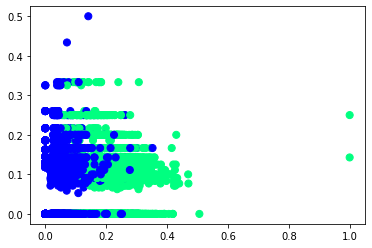

In [ ]:
import matplotlib.pyplot as plt 
# plotting scatters  
plt.scatter(X[:, 0], X[:, 1], c=Y, s=50, cmap='winter'); 
plt.show()  

In [ ]:
"""for recording history"""

for train_index1, valid_index1 in cv.split(x_train_cv1,y_train_cv1):
  history=svm_class.fit(x_train_cv1,y_train_cv1)


In [ ]:
"SVM Model Training"

results_svm = cross_val_score(svm_class, x_train_cv1, y_train_cv1, cv=cv)

In [ ]:
print(results_svm)

[0.95625 0.94    0.94875 0.95    0.95    0.93625 0.93375 0.955   0.94875
 0.955  ]


In [ ]:
"""SVM Model Accuracy on Cross Validation Dataset"""

print("Cross_Validation Accuracy for SVM: %0.2f (+/-%0.2f)" % (results_svm.mean()*100, results_svm.std()*2))

Cross_Validation Accuracy for SVM: 94.74 (+/-0.02)


In [ ]:
y_pred_svm=cross_val_predict(svm_class,x_train_cv1,y_train_cv1,cv=cv)

In [ ]:
cm_svm_cv = confusion_matrix(y_train_cv1, y_pred_svm)
cm_svm_cv

array([[2911,  261],
       [ 160, 4668]])

In [ ]:
from sklearn.metrics import classification_report 
print('Classification report for SVM with Cross Validation')
print(classification_report(y_train_cv1, y_pred_svm))

Classification report for SVM with Cross Validation
              precision    recall  f1-score   support

           0       0.95      0.92      0.93      3172
           1       0.95      0.97      0.96      4828

    accuracy                           0.95      8000
   macro avg       0.95      0.94      0.94      8000
weighted avg       0.95      0.95      0.95      8000



In [ ]:
"code for Accuracy, Precision, Recall and F1-score for Train data SVM"

print(accuracy_score(y_train_cv1, y_pred_svm))
print(precision_score(y_train_cv1, y_pred_svm, average="macro"))
print(recall_score(y_train_cv1, y_pred_svm, average="macro"))  
print(f1_score(y_train_cv1, y_pred_svm, average="macro"))

0.947375
0.9474738948556312
0.9422887559016289
0.9447079817229672


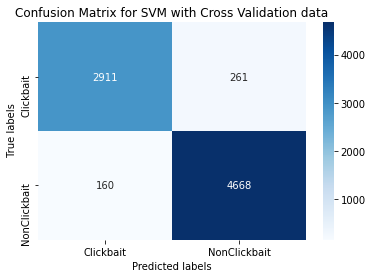

In [ ]:
"""Visulization of confusion matrix for SVM with Cross Validation data"""

import seaborn as sns
import matplotlib.pyplot as plt     

ax= plt.subplot();
#sns.heatmap(cm, annot=True,ax=ax);
sns.heatmap(cm_svm_cv, annot=True,fmt="d", cmap='Blues',ax=ax); #annot=True to annotate cells
# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel(' True labels'); 
ax.set_ylim(2.0, 0)
ax.set_title('Confusion Matrix for SVM with Cross Validation data');
ax.xaxis.set_ticklabels(['Clickbait','NonClickbait']); 
ax.yaxis.set_ticklabels(['Clickbait','NonClickbait']);

In [ ]:
param_range=np.arange(-2,5,1)

In [ ]:
from sklearn.model_selection import validation_curve
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
train_scores, test_scores = validation_curve(SVC(kernel="rbf"), 
                                             x_train_cv1, 
                                             y_train_cv1, 
                                             param_name="C", 
                                             param_range=param_range,
                                             cv=10, 
                                             scoring="accuracy", 
                                             n_jobs=-1)

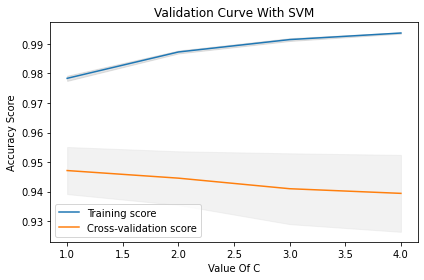

In [ ]:
# Calculate mean and standard deviation for training set scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

# Calculate mean and standard deviation for test set scores
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot mean accuracy scores for training and test sets
plt.plot(param_range, train_mean, label="Training score")
plt.plot(param_range, test_mean, label="Cross-validation score")

# Plot accurancy bands for training and test sets
plt.fill_between(param_range, train_mean - train_std, train_mean + train_std,alpha=0.2, color="gray")
plt.fill_between(param_range, test_mean - test_std, test_mean + test_std,alpha=0.35, color="gainsboro")

# Create plot
plt.title("Validation Curve With SVM")
plt.xlabel("Value Of C")
plt.ylabel("Accuracy Score")
plt.tight_layout()
plt.legend(loc="best")
plt.show()

This part for test data with SVM**

In [ ]:
y_pred_test_svc=svm_class.predict(x_test1)

In [ ]:
print('Classification report for SVM with Test Dataset')
print(classification_report(y_test1, y_pred_test_svc))

Classification report for SVM with Test Dataset
              precision    recall  f1-score   support

           0       0.96      0.93      0.94       828
           1       0.95      0.97      0.96      1172

    accuracy                           0.95      2000
   macro avg       0.95      0.95      0.95      2000
weighted avg       0.95      0.95      0.95      2000



In [ ]:
"code for Accuracy, Precision, Recall and F1-score for Test data SVM"

print(accuracy_score(y_test1, y_pred_test_svc))
print(precision_score(y_test1, y_pred_test_svc, average="macro"))
print(recall_score(y_test1, y_pred_test_svc, average="macro"))  
print(f1_score(y_test1, y_pred_test_svc, average="macro"))

0.9515
0.9522974305470955
0.9476286458590955
0.9497716292038104


In [ ]:
"""Confusion Matrix array"""

#y_s_test=np.argmax(y_test1, axis=1)
cm_svm_test = confusion_matrix(y_test1, y_pred_test_svc)
cm_svm_test

array([[ 766,   62],
       [  35, 1137]])

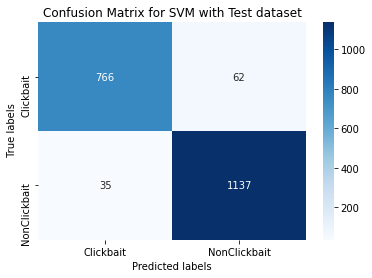

In [ ]:
"""Visulization of confusion matrix for SVM with Test data"""

import seaborn as sns
import matplotlib.pyplot as plt     

ax= plt.subplot();
#sns.heatmap(cm, annot=True,ax=ax);
sns.heatmap(cm_svm_test, annot=True,fmt="d", cmap='Blues',ax=ax); #annot=True to annotate cells
# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel(' True labels'); 
ax.set_ylim(2.0, 0)
ax.set_title('Confusion Matrix for SVM with Test dataset');
ax.xaxis.set_ticklabels(['Clickbait','NonClickbait']); 
ax.yaxis.set_ticklabels(['Clickbait','NonClickbait']);

# **This part for RFC**

In [ ]:
""" Code for defining RF model """
from sklearn.ensemble import RandomForestClassifier
rfc_class = RandomForestClassifier(n_estimators=64,random_state=0)
""" Code for defining other models """



' Code for defining other models '

In [ ]:
rfc_class.fit(x_train_cv1,y_train_cv1)
estimator = rfc_class.estimators_[5]

In [ ]:
from sklearn.tree import export_graphviz
# Export as dot file
export_graphviz(estimator, out_file='tree.dot', 
                feature_names =df_all.iloc[ :,1:] ,
                class_names = df_all.iloc[ :,0:1] ,
                rounded = True, proportion = False, 
                precision = 2, filled = True)

ValueError: ignored

In [ ]:
# Convert to png using system command (requires Graphviz)
from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])

# Display in jupyter notebook
from IPython.display import Image
Image(filename = 'tree.png')

In [ ]:
for train_index1, valid_index1 in cv.split(x_train_cv1,y_train_cv1):
  history=rfc_class.fit(x_train_cv1,y_train_cv1)

In [ ]:
"RFC Model Training"

results_rfc = cross_val_score(rfc_class, x_train_cv1, y_train_cv1, cv=cv)

In [ ]:
print(results_rfc)

[0.95    0.9425  0.9425  0.95    0.9525  0.93125 0.94125 0.955   0.94875
 0.9475 ]


In [ ]:
"""Model Accuracy on Trainset with Cross Validation"""

print("Cross_Validation Accuracy-RFC: %0.2f (+/-%0.2f)" % (results_rfc.mean()*100, results_rfc.std()*2))

Cross_Validation Accuracy-RFC: 94.61 (+/-0.01)


In [ ]:
y_pred_rfc=cross_val_predict(rfc_class,x_train_cv1,y_train_cv1,cv=cv)

In [ ]:

#y_svm=np.argmax(y_train_cv1, axis=1)

cm_rfc_cv = confusion_matrix(y_train_cv1, y_pred_rfc)
cm_rfc_cv

array([[2928,  244],
       [ 187, 4641]])

In [ ]:

print('Classification report for RFC with Cross Validation')
print(classification_report(y_train_cv1, y_pred_rfc))

Classification report for RFC with Cross Validation
              precision    recall  f1-score   support

           0       0.94      0.92      0.93      3172
           1       0.95      0.96      0.96      4828

    accuracy                           0.95      8000
   macro avg       0.95      0.94      0.94      8000
weighted avg       0.95      0.95      0.95      8000



In [ ]:
"code for Accuracy, Precision, Recall and F1-score for Train data RF"

print(accuracy_score(y_train_cv1, y_pred_rfc))
print(precision_score(y_train_cv1, y_pred_rfc, average="macro"))
print(recall_score(y_train_cv1, y_pred_rfc, average="macro"))  
print(f1_score(y_train_cv1, y_pred_rfc, average="macro"))

0.946125
0.9450095371719698
0.9421722643553629
0.9435361602993999


In [ ]:
from sklearn.metrics import precision_recall_fscore_support as score

precision, recall, fscore, support = score(y_train_cv1, y_pred_rfc)

print('precision: {}'.format(precision))
print('recall: {}'.format(recall))
print('fscore: {}'.format(fscore))
print('support: {}'.format(support))

precision: [0.9399679  0.95005118]
recall: [0.92307692 0.96126761]
fscore: [0.93144584 0.95562648]
support: [3172 4828]


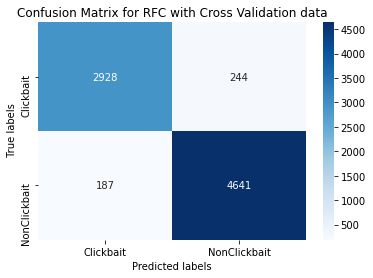

In [ ]:
"""Visulization of confusion matrix for RFC with Cross Validation data"""

import seaborn as sns
import matplotlib.pyplot as plt     

ax= plt.subplot();
#sns.heatmap(cm, annot=True,ax=ax);
sns.heatmap(cm_rfc_cv, annot=True,fmt="d", cmap='Blues',ax=ax); #annot=True to annotate cells
# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel(' True labels'); 
ax.set_ylim(2.0, 0)
ax.set_title('Confusion Matrix for RFC with Cross Validation data');
ax.xaxis.set_ticklabels(['Clickbait','NonClickbait']); 
ax.yaxis.set_ticklabels(['Clickbait','NonClickbait']);

In [ ]:
param_range=np.arange(1,250,2)

In [ ]:

train_scores, test_scores = validation_curve(RandomForestClassifier(), 
                                             x_train_cv1, 
                                             y_train_cv1, 
                                             param_name="n_estimators", 
                                             param_range=param_range,
                                             cv=10, 
                                             scoring="accuracy", 
                                             n_jobs=-1)

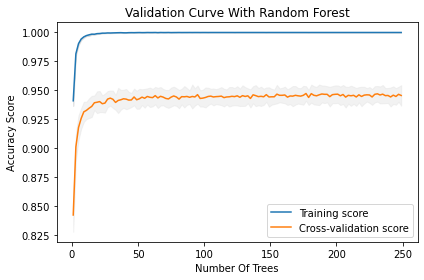

In [ ]:
# Calculate mean and standard deviation for training set scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

# Calculate mean and standard deviation for test set scores
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot mean accuracy scores for training and test sets
plt.plot(param_range, train_mean, label="Training score")
plt.plot(param_range, test_mean, label="Cross-validation score")

# Plot accurancy bands for training and test sets
plt.fill_between(param_range, train_mean - train_std, train_mean + train_std,alpha=0.2, color="gray")
plt.fill_between(param_range, test_mean - test_std, test_mean + test_std,alpha=0.35, color="gainsboro")

# Create plot
plt.title("Validation Curve With Random Forest")
plt.xlabel("Number Of Trees")
plt.ylabel("Accuracy Score")
plt.tight_layout()
plt.legend(loc="best")
plt.show()

**This part for Test dataset with RFC**

In [ ]:
y_pred_test_rf=rfc_class.predict(x_test1)

In [ ]:
print('Classification report for RFC with Test Dataset')
print(classification_report(y_test1, y_pred_test_rf))

Classification report for RFC with Test Dataset
              precision    recall  f1-score   support

           0       0.95      0.92      0.93       828
           1       0.94      0.96      0.95      1172

    accuracy                           0.94      2000
   macro avg       0.94      0.94      0.94      2000
weighted avg       0.94      0.94      0.94      2000



In [ ]:
"code for Accuracy, Precision, Recall and F1-score for Test data RF"

print(accuracy_score(y_test1, y_pred_test_rf))
print(precision_score(y_test1, y_pred_test_rf, average="weighted"))
print(recall_score(y_test1, y_pred_test_rf, average="weighted"))  
print(f1_score(y_test1, y_pred_test_rf, average="weighted"))

0.9435
0.9435356198715967
0.9435
0.9433651050160216


In [ ]:
from sklearn.metrics import precision_recall_fscore_support as score

precision, recall, fscore, support = score(y_test1, y_pred_test_rf)

print('precision: {}'.format(precision))
print('recall: {}'.format(recall))
print('fscore: {}'.format(fscore))
print('support: {}'.format(support))

precision: [0.94520548 0.94235589]
recall: [0.91666667 0.96245734]
fscore: [0.93071735 0.95230055]
support: [ 828 1172]


In [ ]:
"""Confusion Matrix array"""

#y_s_test=np.argmax(y_test1, axis=1)

cm_rfc_test = confusion_matrix(y_test1, y_pred_test_rf)
cm_rfc_test

array([[ 759,   69],
       [  44, 1128]])

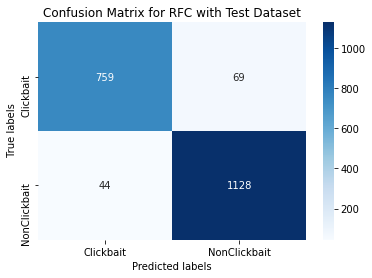

In [ ]:
"""Visulization of confusion matrix for RFC with Test Dataset"""

import seaborn as sns
import matplotlib.pyplot as plt     

ax= plt.subplot();
#sns.heatmap(cm, annot=True,ax=ax);
sns.heatmap(cm_rfc_test, annot=True,fmt="d", cmap='Blues',ax=ax); #annot=True to annotate cells
# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel(' True labels'); 
ax.set_ylim(2.0, 0)
ax.set_title('Confusion Matrix for RFC with Test Dataset');
ax.xaxis.set_ticklabels(['Clickbait','NonClickbait']); 
ax.yaxis.set_ticklabels(['Clickbait','NonClickbait']);

## **-------------------------------------------------------------------------------------**

# **This part for DNN**

In [ ]:
"""Dataset split into Cross-validation dataset and Test dataset with 70:30 """

from sklearn.model_selection import train_test_split
x_train_cv,x_test,y_train_cv,y_test=train_test_split(X,y,test_size=0.3,random_state=0)
x_train_cv.shape


(7000, 3001)

In [ ]:
###Can be excluded###

"""Code for Train-Test split"""

from sklearn.model_selection import train_test_split
#x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1,random_state=0)
x_train_cv.shape
#,y_train.shape
#x_test.shape,y_test.shape

(7000, 3001)

In [ ]:
"""Code for defining a DNN model"""

def baseline_model():
    # create model
    model = Sequential()
    model.add(Dense(16,activation='relu',input_dim=X.shape[1]))
    #model.add(Dense(256, activation='relu'))
    model.add(Dense(16, activation='relu'))
    model.add(Dense(8, activation='relu'))
    #model.add(Dropout(0.1))
    model.add(Dense(2, activation='softmax'))

    # Compile model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model
model = baseline_model()
model.summary()

Model: "sequential_125"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_500 (Dense)            (None, 16)                48032     
_________________________________________________________________
dense_501 (Dense)            (None, 16)                272       
_________________________________________________________________
dense_502 (Dense)            (None, 8)                 136       
_________________________________________________________________
dense_503 (Dense)            (None, 2)                 18        
Total params: 48,458
Trainable params: 48,458
Non-trainable params: 0
_________________________________________________________________


In [ ]:
"""Code for fitting the model"""

estimator = KerasClassifier(build_fn=baseline_model, epochs=25, batch_size=50, verbose=1)
#estimator.fit(x_train,y_train)

In [ ]:
"""10 fold for cross validation"""
#from sklearn.model_selection import StratifiedKFold, cross_val_score
#kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
kf = KFold(n_splits=10, shuffle=True,random_state=0)


In [ ]:
##NEw lines of code inserted###

for train_index, valid_index in kf.split(x_train_cv,y_train_cv):
    x_train,x_valid=x[train_index], x[valid_index]
    y_train, y_valid = y[train_index], y[valid_index]
    #print("Train Index: ", x[train_index], "\n")
    #print("Test Index: ", test_index)
    #classifier.fit(x_train,y_train)
    history=estimator.fit(x_train,y_train, validation_data=(x_valid,y_valid))

In [ ]:
results = cross_val_score(estimator, x_train_cv, y_train_cv, cv=kf)

In [ ]:
"""Fold wise result"""

print(results)

[0.93857145 0.93142855 0.95571429 0.94       0.94142854 0.94714284
 0.93000001 0.95285714 0.94999999 0.94      ]


In [ ]:
"""Model Accuracy on Trainset with Cross Validation"""

print("Cross_Validation Accuracy: %0.2f (+/-%0.2f)" % (results.mean()*100, results.std()*2))

Cross_Validation Accuracy: 94.31 (+/-0.02)


In [ ]:
history_dict = history.history
print(history_dict.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


In [ ]:
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

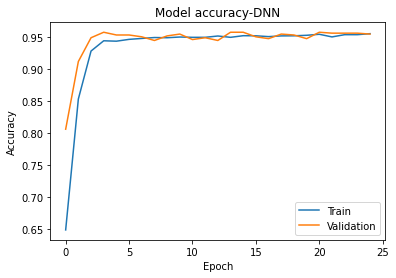

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy-DNN')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.show()

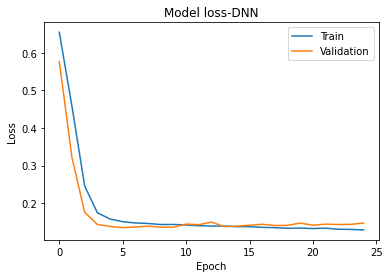

In [ ]:
"""Train vs Validation Loss"""

plt.plot(history.history['loss']) 
plt.plot(history.history['val_loss']) 
plt.title('Model loss-DNN') 
plt.ylabel('Loss') 
plt.xlabel('Epoch') 
plt.legend(['Train', 'Validation'], loc='upper right') 
plt.show()

In [ ]:
y_pred=cross_val_predict(estimator,x_train_cv,y_train_cv,cv=kf)

In [ ]:
import numpy as np
y_d=np.argmax(y_train_cv, axis=1)
from sklearn.metrics import confusion_matrix
cm_dnn_cv = confusion_matrix(y_d, y_pred)
cm_dnn_cv

In [ ]:
from sklearn.metrics import classification_report 
print('Classification report for DNN with Cross Validation')
print(classification_report(y_d, y_pred))

In [ ]:
"code for Accuracy, Precision, Recall and F1-score for Train data DNN"

print(accuracy_score(y_d, y_pred))
print(precision_score(y_d, y_pred, average="weighted"))
print(recall_score(y_d, y_pred, average="weighted"))  
print(f1_score(y_d, y_pred, average="weighted"))

In [ ]:
from sklearn.metrics import precision_recall_fscore_support as score

precision, recall, fscore, support = score(y_d, y_pred)

print('precision: {}'.format(precision))
print('recall: {}'.format(recall))
print('fscore: {}'.format(fscore))
print('support: {}'.format(support))

In [ ]:
"""Visulization of confusion matrix with Cross Validation"""

import seaborn as sns
import matplotlib.pyplot as plt     

ax= plt.subplot();
#sns.heatmap(cm, annot=True,ax=ax);
sns.heatmap(cm_dnn_cv, annot=True,fmt="d", cmap='Blues',ax=ax); #annot=True to annotate cells
# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel(' True labels'); 
ax.set_ylim(2.0, 0)
ax.set_title('Confusion Matrix for DNN with Cross Validation data');
ax.xaxis.set_ticklabels(['Clickbait','NonClickbait']); 
ax.yaxis.set_ticklabels(['Clickbait','NonClickbait']);

**This part for Test dataset**


In [ ]:
###For prediction on test data###
y_pred_test=estimator.predict(x_test)

In [ ]:
"""Code for testing prediction on index[0]"""

print(y_test[0])
print(y_pred_test[0])

In [ ]:
###New lines of code###

import numpy as np
y_d_test=np.argmax(y_test, axis=1)
from sklearn.metrics import confusion_matrix
cm_dnn_test = confusion_matrix(y_d_test, y_pred_test)
cm_dnn_test

In [ ]:
from sklearn.metrics import classification_report 
print('Classification report for DNN with Test dataset')
print(classification_report(y_d_test, y_pred_test))

In [ ]:
"code for Accuracy, Precision, Recall and F1-score for Test data DNN"

print(accuracy_score(y_d_test, y_pred_test))
print(precision_score(y_d_test, y_pred_test, average="macro"))
print(recall_score(y_d_test, y_pred_test, average="macro"))  
print(f1_score(y_d_test, y_pred_test, average="macro"))

In [ ]:
from sklearn.metrics import precision_recall_fscore_support as score

precision, recall, fscore, support = score(y_d_test, y_pred_test)

print('precision: {}'.format(precision))
print('recall: {}'.format(recall))
print('fscore: {}'.format(fscore))
print('support: {}'.format(support))

In [ ]:
"""Visulization of confusion matrix for Test"""

import seaborn as sns
import matplotlib.pyplot as plt     

ax= plt.subplot();
#sns.heatmap(cm, annot=True,ax=ax);
sns.heatmap(cm_dnn_test, annot=True,fmt="d", cmap='Blues',ax=ax); #annot=True to annotate cells
# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel(' True labels'); 
ax.set_ylim(2.0, 0)
ax.set_title('Confusion Matrix for DNN with Testdata');
ax.xaxis.set_ticklabels(['Clickbait','NonClickbait']); 
ax.yaxis.set_ticklabels(['Clickbait','NonClickbait']);
